In [1]:
from os.path import join

import sympy
from sympy import Symbol, sqrt, cos, pi, symbols
import numpy as np
import matplotlib.pylab as plt

import qnet
from qnet.algebra import *

import QDYN

from src.notebook_plots_v1 import plot_bs_decay, display_hamiltonian, display_eq, show_summary_dicke
from src.single_sided_network_v1 import network_slh
from src.dicke_half_model_v2 import write_dicke_half_model, err_dicke_half

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
qnet.init_printing()

$
\newcommand{ket}[1]{\vert #1 \rangle}
\newcommand{bra}[1]{\langle #1 \vert}
\newcommand{Op}[1]{\hat{#1}}
$

# If kappa is increased, does this scale the speed limit?

##  Optimization of Dicke state at T=100

In [4]:
slh = network_slh(n_cavity=2, n_nodes=2, topology='driven_bs_fb')
write_dicke_half_model(
    slh, rf='./data/2nodes_kappa1e0_T100_rho', T=100, theta=0,
    kappa=1.0, E0_cycles=2, mcwf=False, non_herm=False, lambda_a=0.01)

After 1000 iterations, and propagating resulting optimized pulse in Liouville space:

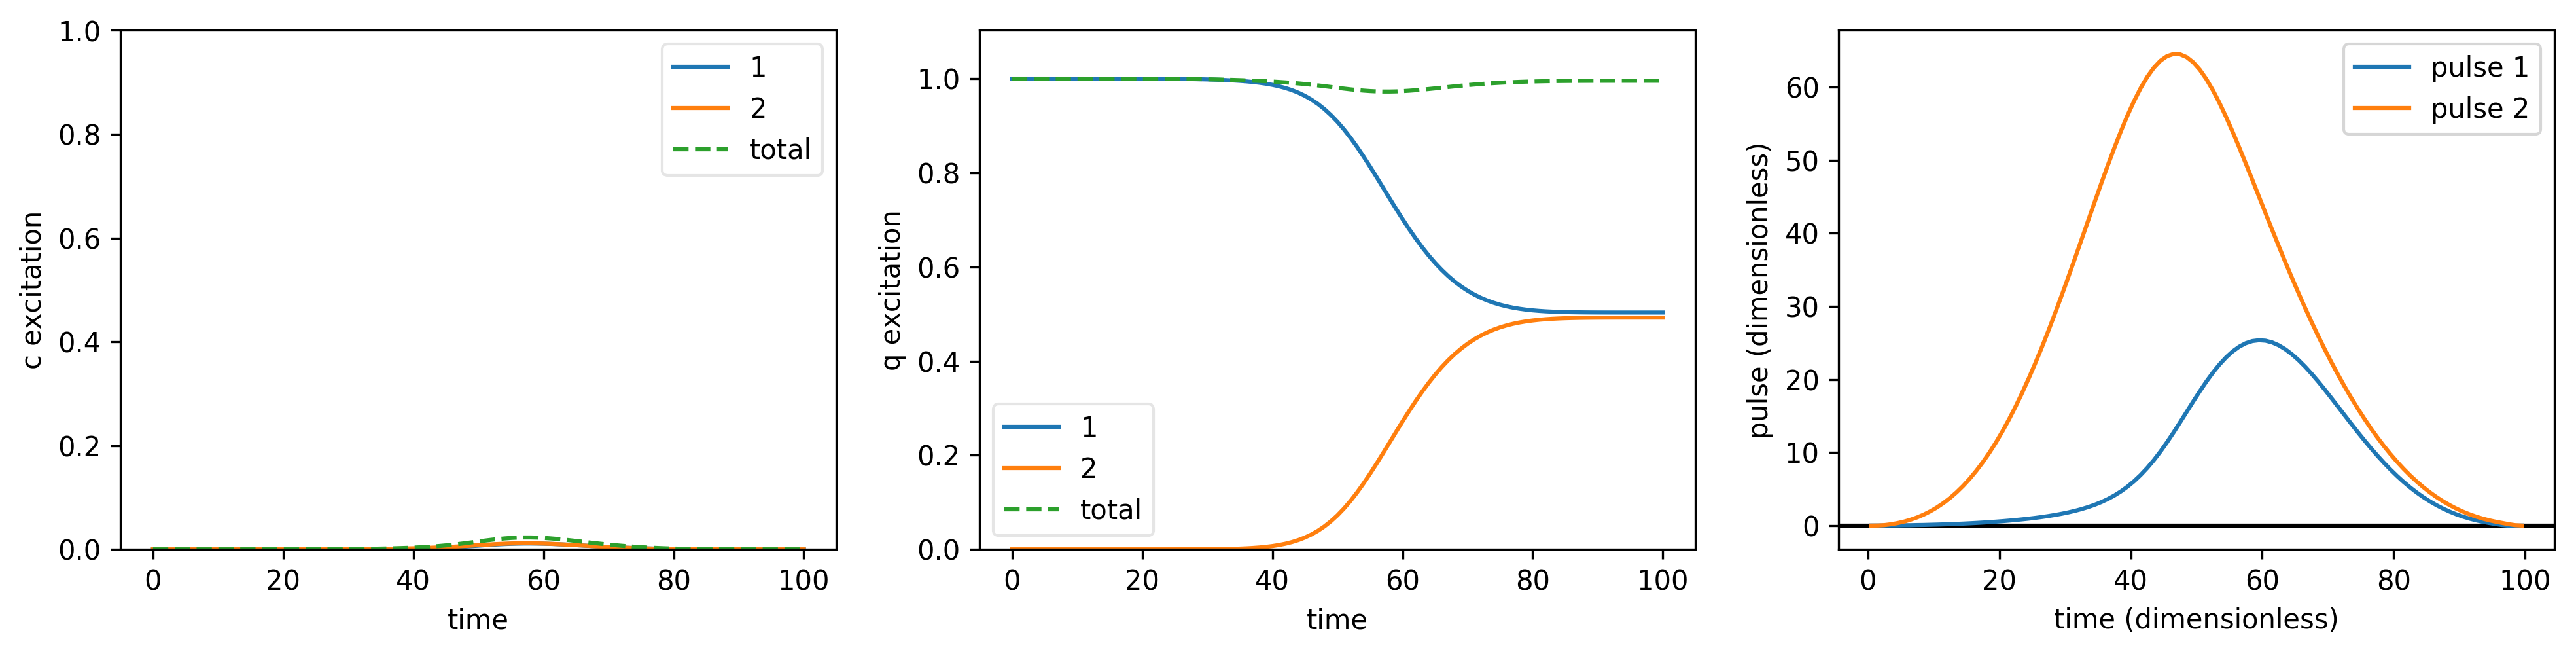

In [5]:
show_summary_dicke('./data/2nodes_kappa1e0_T100_rho', dpi=300)

In [6]:
print("%.3e" % err_dicke_half('./data/2nodes_kappa1e0_T100_rho', 'state_final.dat*', rho=True))

4.529e-03


## What is the QSL for kappa=1?

In [26]:
Ts = [1, 2, 3, 4, 5, 8, 10, 15, 20, 30, 40, 50]

In [32]:
for T in Ts:
    write_dicke_half_model(
        slh, rf='./data/2nodes_kappa1e0_T%03d_rho' % T, T=T, theta=0, nt=100,
        kappa=1.0, E0_cycles=2, mcwf=False, non_herm=False, lambda_a=0.01, iter_stop=25000)

In [28]:
Ts2 = sorted(Ts + [100, ])

In [29]:
Ts2

In [30]:
def get_errors(Ts):
    errors = {}
    for T in Ts:
        fn = './data/2nodes_kappa1e0_T%03d_rho/oct_iters.dat' % T
        errors[T] = np.genfromtxt(fn, usecols=(1,), unpack=True)
    return errors

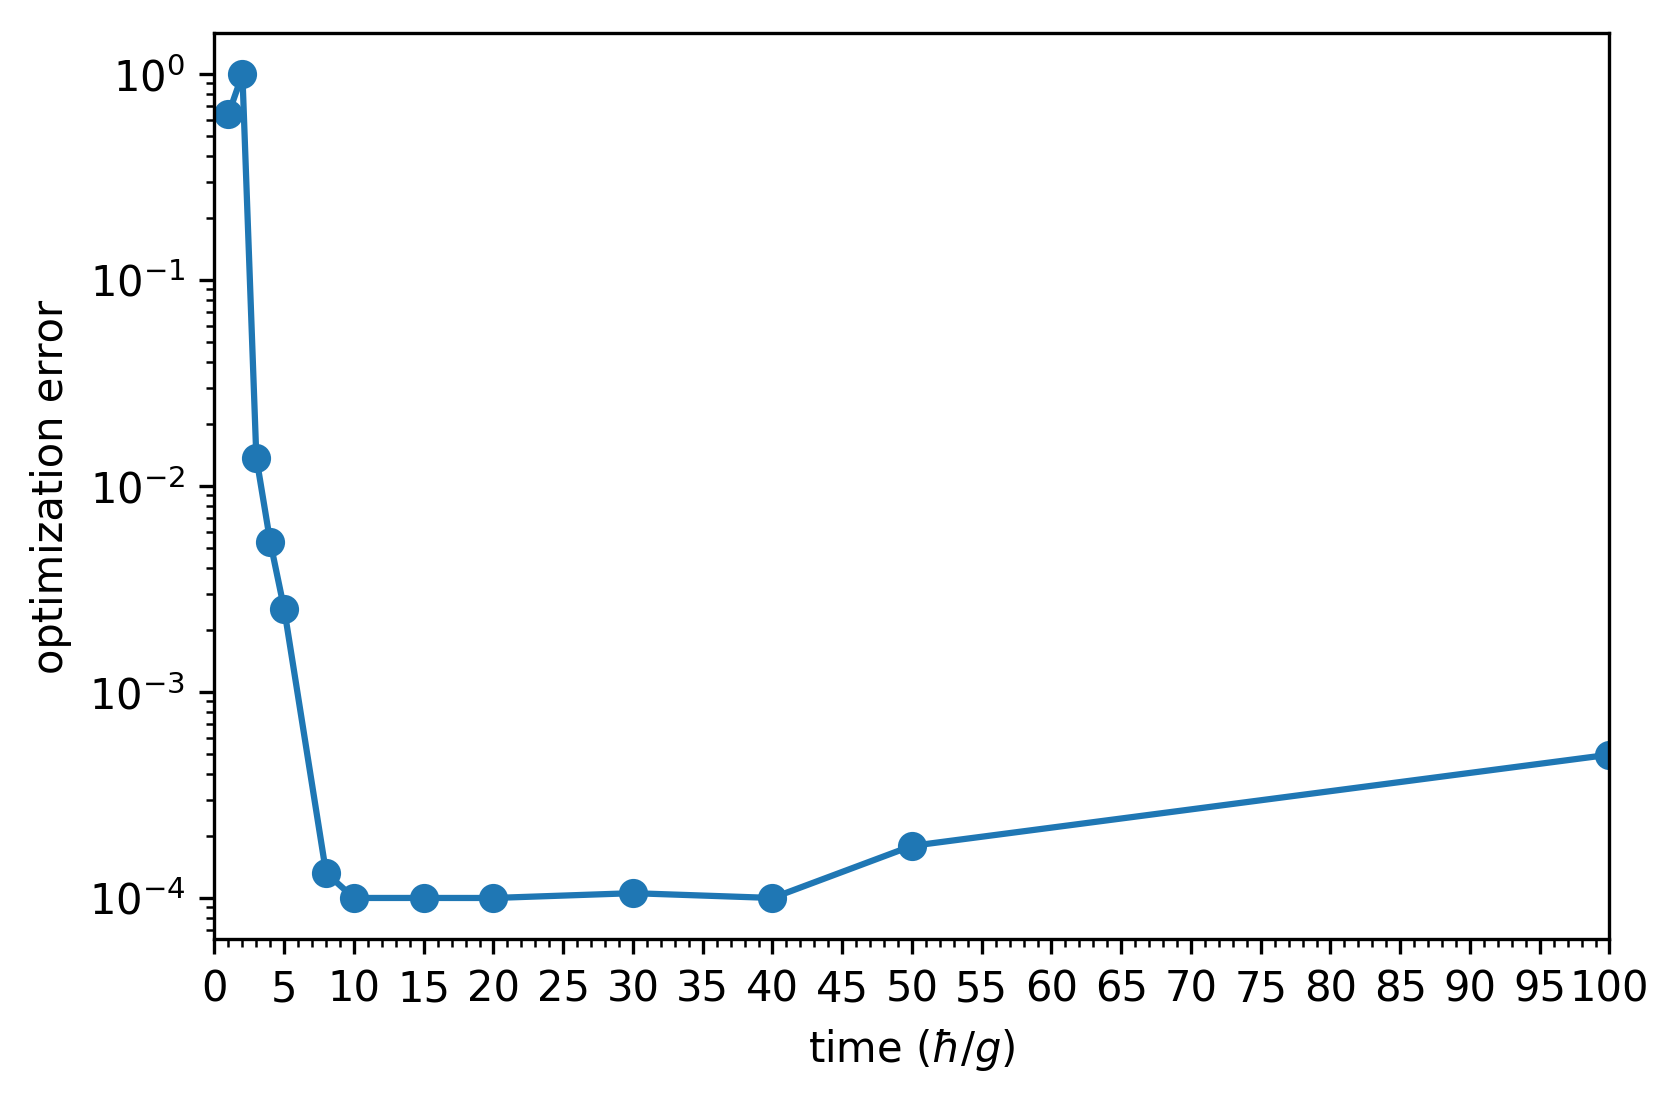

In [43]:
errors = get_errors(Ts2)

def plot_errors():
    from mgplottools.mpl import set_axis
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111)
    ax.plot(Ts2, [errors[T][-1] for T in Ts2], 'o-')
    ax.set_yscale('log')
    ax.set_xlabel(r'time ($\hbar/g$)')
    ax.set_ylabel(r'optimization error')
    set_axis(ax, 'x', 0, 100, step=5, minor=5)
    plt.show(fig)

plot_errors()

What is happening at $T=10$?

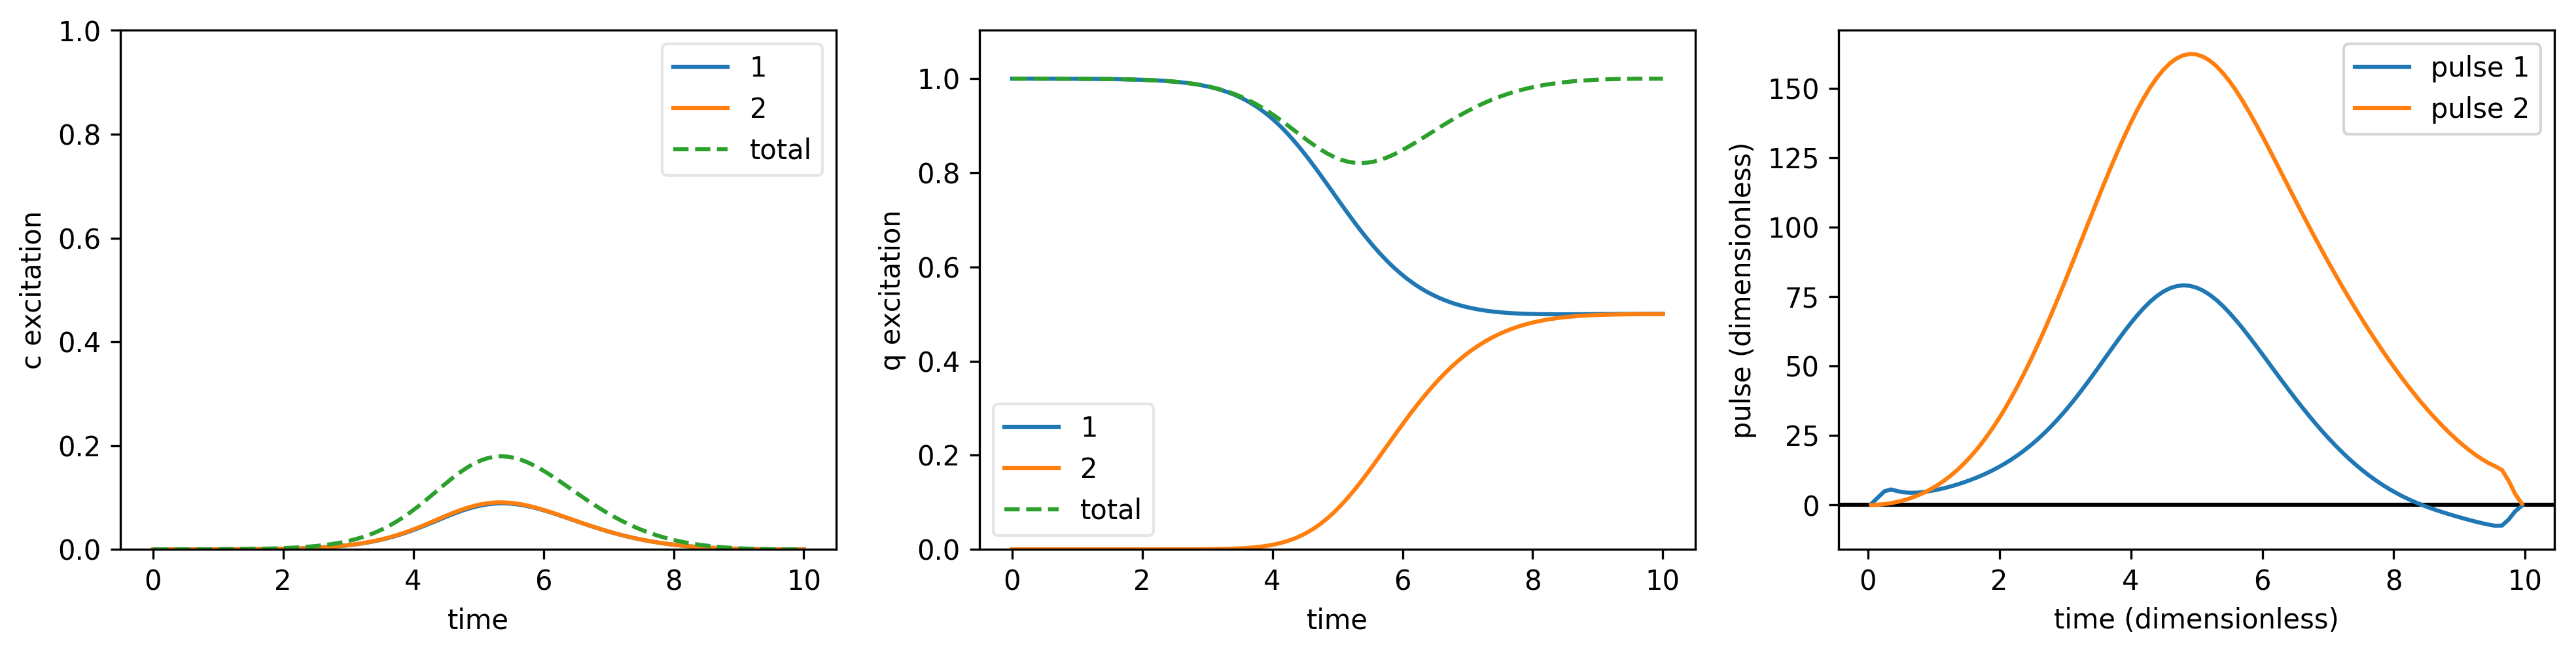

In [17]:
show_summary_dicke('./data/2nodes_kappa1e0_T010_rho', dpi=300)

It is worth noting that *at* the speed limit, the optimization is easiest (least number of iterations required to converge)

# Example optimization commands

*   density matrix optimization

    ```OMP_NUM_THREADS=1 qdyn_optimize --J_T=J_T_re .```

*   trajectory optimization

    ```OMP_NUM_THREADS=1 qdyn_optimize --n-trajs=20 --J_T=J_T_sm .```
   
*   density matrix propagation

    ```OMP_NUM_THREADS=1 qdyn_prop_traj --use-oct-pulses --write-final-state=state_final.dat .```